Critical Transition Analysis
============================

Based from the concept of pre-bifurcation struture from [Bargaje17]_.
This study proposes the idea that a signature indicating the flattening
of the quasi-potential landscape can be detected prior to bifurcation. 

To detect this signal, authors proposed a measurment, called **critical transition index** which is calculated as following:

$$\frac{<{\left | R(g_i,g_j) \right |>}}{<\left | R(c_k,c_l) \right |>}$$

Which is the ratio between the mean of the absolute gene by gene correlations and the mean of the absolute cell by cell correlations.

While authors applied this calculation on groups of differentiating cells for each timepoint they sampled, we propose here to compute this signal lcoally on a moving window of cells along the pseudotine axis.

## Loading data

Here will use the pancreas dataset that we used in the CellRank conversion notebook. It has been already processed with annotated tree and tested associated features.

In [1]:
import scFates as scf
import scanpy as sc
adata=scf.datasets.pancreas()

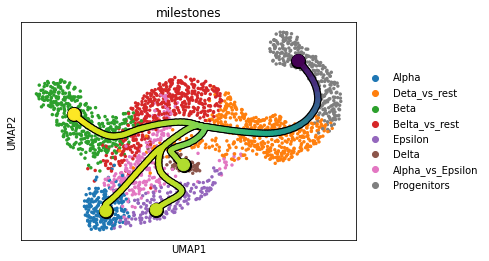

In [2]:
scf.pl.trajectory(adata,color_cells="milestones")

## Calculation of the local critical transition index

Let's estimate the local critical transition index along the trajectory, using the following function:


In [3]:
scf.tl.critical_transition(adata,"Progenitors",["Beta","Epsilon"],n_jobs=20)

Calculating local critical transition index
    leave Epsilon: 100%|██████████| 34/34 [00:00<00:00, 10373.63it/s]
    loess fitting and predicting cell-wise CI
    finished (0:00:14) --> added 
    .uns['Progenitors->Beta<>Epsilon']['critical transition'], df containing local critical transition index per window of cells.
    .obs['Progenitors->Beta<>Epsilon pre-fork CI lowess'], local critical transition index loess fitted onto cells prior to bifurcation.


<div class="alert alert-warning">
    
**Warning**

A key parameter to consider is the size of the window and the step size for the sliding, by default these are `w=100` and `step=30`. These would require some tuning depending on the number of cells analysed.

</div>

## Visualisation of the local critical transition index

The previous function generate two type of data: overview loess fit over the sliding window of cells, in:

`adata.uns['Progenitors->Beta<>Epsilon']['critical transition']`

And and predicted loess fit a the cell level:

`adata.obs['Progenitors->Beta<>Epsilon pre-fork CI lowess']`

The latter will be useful to extrract correlated features

### Sliding window Loess fit

An overview of the trends can be visualised along the pseudotime axis, one can focus on both branches but also only on the pre-bifurcation branch, with the parameter `path`.

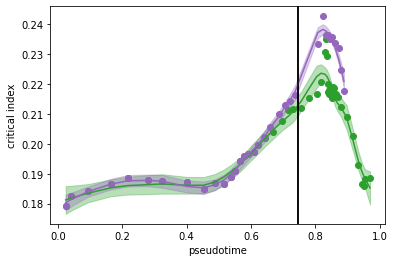

In [4]:
scf.pl.critical_transition(adata,"Progenitors",["Beta","Epsilon"])

### Projection onto cells

We can also obtain a more granular view.

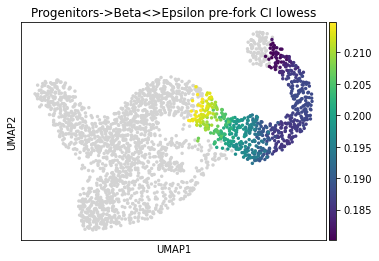

In [5]:
sc.pl.umap(adata,color='Progenitors->Beta<>Epsilon pre-fork CI lowess')

## Identification of potential drivers of the critical transition

Using the cell projected values, we can now find which genes are mostly correlated to the found critical index:

In [6]:
scf.tl.criticality_drivers(adata,"Progenitors",["Beta","Epsilon"])

Calculating gene to critical transition index correlations
    finished (0:00:00) --> added 
    .uns['Progenitors->Beta<>Epsilon']['criticality drivers'], df containing gene correlation with critical index transition.


In [7]:
adata.uns['Progenitors->Beta<>Epsilon']['criticality drivers']

,corr,pval,ci_low,ci_high,q_val
Chga,0.767389,0.0,0.750878,0.782942,0.0
Runx1t1,0.750966,0.0,0.733464,0.767472,0.0
Fev,0.736353,0.0,0.717990,0.753692,0.0
Cpe,0.729282,0.0,0.710509,0.747018,0.0
Chgb,0.709510,0.0,0.689612,0.728338,0.0
...,...,...,...,...,...
Reln,NaN,NaN,NaN,NaN,NaN
Sult1d1,NaN,NaN,NaN,NaN,NaN
Nap1l5,NaN,NaN,NaN,NaN,NaN
Th,NaN,NaN,NaN,NaN,NaN


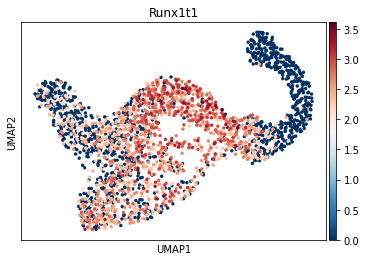

In [8]:
sc.pl.umap(adata,color="Runx1t1",cmap="RdBu_r")